In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
import seaborn as sns

# Set matplotlib style
plt.style.use('seaborn')

In [2]:
# download quotes
tickers = ['TLT', 'SPY']
Quotes = pd.DataFrame()
Start ='2002-12-15'
End = "2013-03-20"

for t in tickers:
    Quotes[t] =pdr.get_data_yahoo(t, start=Start, end=End)['Adj Close'] 

In [35]:
Quotes.head()

,TLT,SPY
Date,,
2002-12-16,49.516724,68.361763
2002-12-17,49.516724,67.765068
2002-12-18,49.903030,66.981834
2002-12-19,50.347008,66.504486
2002-12-20,50.381596,67.453438


In [30]:
# Turning daily quotes into weekly
Quotes_W = Quotes.resample('W-FRI').last().resample('W-FRI').last()

In [31]:
Quotes_W.tail()

,TLT,SPY
Date,,
2013-02-22,103.712753,138.786606
2013-03-01,105.596298,138.987579
2013-03-08,101.910637,142.030304
2013-03-15,102.807617,143.019958
2013-03-22,103.127327,142.891510


In [32]:
# Turning daily quotes into monthly
Quotes_M = Quotes.resample('M').last().resample('M').last()

In [34]:
Quotes_M.head()

,TLT,SPY
Date,,
2002-12-31,51.324238,66.134171
2003-01-31,51.028702,64.507637
2003-02-28,52.609234,63.638130
2003-03-31,51.891277,63.774307
2003-04-30,52.435295,69.170357


In [4]:
Returns = Quotes.pct_change()

In [5]:
#### Normalization to 100 ####
Quotes_norm = (Quotes / Quotes.iloc[0] * 100)

In [6]:
Quotes_norm.head()

,TLT,SPY
Date,,
2002-12-16,100.000000,100.000000
2002-12-17,100.000000,99.127151
2002-12-18,100.780153,97.981432
2002-12-19,101.676775,97.283164
2002-12-20,101.746626,98.671297


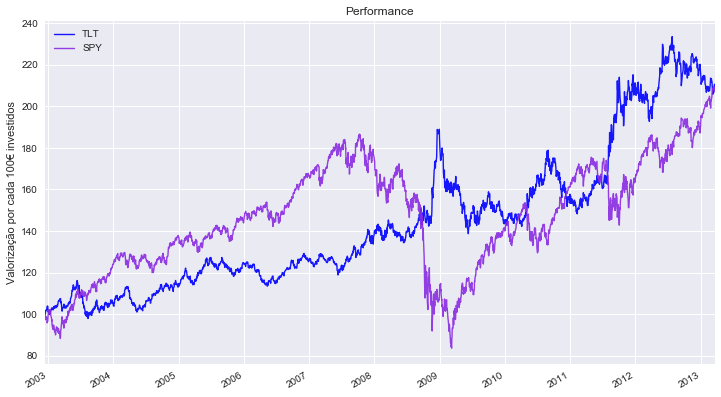

In [7]:
Quotes_norm.plot(figsize = (12, 7), color=('blue', 'blueviolet'), lw=1.4, alpha = 0.9)
plt.title('Performance')
plt.xlabel('')
plt.ylabel('Valorização por cada 100€ investidos')
plt.show()

In [8]:
### weights ####
weights = np.array([0.5, 0.5])

### Calculate Portfolio value with linear algebra ####
Portfolios = Quotes_norm.copy()
Portfolios["Portfolio"] = np.dot(Portfolios, weights) # weights * quotes

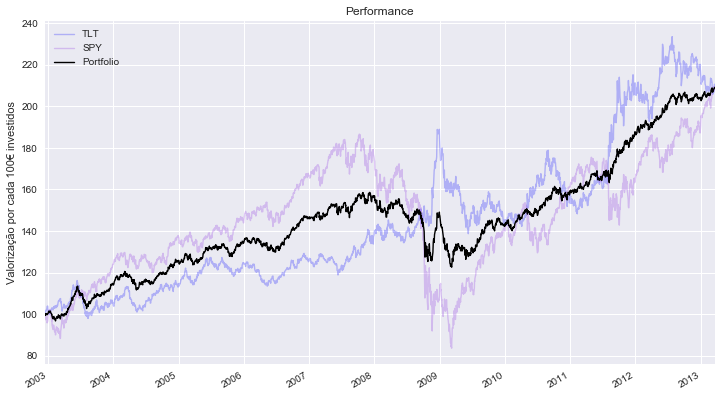

In [9]:
Portfolios['TLT'].plot(figsize = (12, 7), color='Blue', lw=1.4, alpha = 0.25)
Portfolios['SPY'].plot(figsize = (12, 7), color='Blueviolet', lw = 1.4, alpha = 0.25)
Portfolios['Portfolio'].plot(figsize = (12, 7), color='Black', lw = 1.4)
plt.title('Performance')
plt.xlabel('')
plt.ylabel('Valorização por cada 100€ investidos')
plt.legend(loc='upper left')
plt.show()

In [10]:
Portfolios_ret = Portfolios.pct_change()

In [11]:
Portfolios_std = Portfolios_ret.apply(func = np.std)

In [12]:
Portfolios_std = pd.DataFrame(Portfolios_std).transpose()  * 1000

In [13]:
Portfolios_std

,TLT,SPY,Portfolio
0,8.862787,12.936135,5.824946


In [14]:
Returns_corr = Returns.corr()

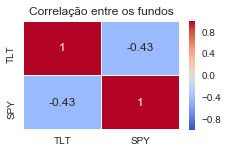

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(3.5, 2)
sns.heatmap(Returns_corr, annot = True, cmap = "coolwarm", linewidths=.2)
plt.title('Correlação entre os fundos')
plt.show()

In [36]:
# download quotes
Start ='2002-12-15'
End = "2013-03-20"

SPY =pdr.get_data_yahoo('SPY', start=Start, end=End)